# Clasificación de imágenes

En este cuaderno exploraremos una tarea de clasificación de imágenes. En particular trataremos de entrenar un clasificador en el dataset [MNIST](http://yann.lecun.com/exdb/mnist/), el cual consiste en imágenes de los dígitos del 0 al 9 escritos por personas.

In [0]:
import numpy as np
import tensorflow as tf

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

primero observemos los datos que tenemos

In [6]:
msg = "Shape of {} is {}"
print(msg.format('X_train', X_train.shape))
print(msg.format('y_train', y_train.shape))
print(msg.format('X_test', X_test.shape))
print(msg.format('y_test', y_test.shape))

Shape of X_train is (60000, 28, 28)
Shape of y_train is (60000,)
Shape of X_test is (10000, 28, 28)
Shape of y_test is (10000,)


tenemos 60mil imágenes de entrenamiento y 10mil de prueba, cada imagen tiene 28 pixeles de ancho y alto. Miremos unas cuantas

In [0]:
def sample_data(data, sample_size=5):
    indices = np.random.randint(0, data.shape[0], size=sample_size)
    return data[indices, ...]

In [0]:
def show_images(images):
    cols = 5
    rows = int(images.shape[0]/cols)
    
    fig = plt.figure(figsize=(rows*5, cols*5))
    
    for i in range(images.shape[0]):
        ax=fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

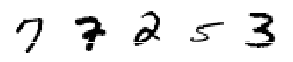

In [9]:
sample_images = sample_data(X_train)
show_images(sample_images)

In [0]:
def reshape_fn(images):
    n, height, width = images.shape
    return np.reshape(images, (n, height*width))

In [19]:
model = Pipeline(
    [
        ('reshape', FunctionTransformer(reshape_fn, validate=False)),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=40, svd_solver='randomized')),
        ('clf', SVC(kernel='rbf'))
        
    ]
)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('reshape', FunctionTransformer(accept_sparse=False,
          func=<function reshape_fn at 0x7fbbaae10b70>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pc...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [20]:
print("-------Report on train data-----------")
print(classification_report(y_train, model.predict(X_train)))
print("-------Report on test data-----------")
print(classification_report(y_test, model.predict(X_test)))

-------Report on train data-----------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5923
          1       1.00      1.00      1.00      6742
          2       1.00      1.00      1.00      5958
          3       1.00      1.00      1.00      6131
          4       1.00      1.00      1.00      5842
          5       1.00      1.00      1.00      5421
          6       1.00      1.00      1.00      5918
          7       1.00      1.00      1.00      6265
          8       1.00      1.00      1.00      5851
          9       1.00      1.00      1.00      5949

avg / total       1.00      1.00      1.00     60000

-------Report on test data-----------
             precision    recall  f1-score   support

          0       0.99      0.91      0.95       980
          1       0.99      0.99      0.99      1135
          2       0.55      0.99      0.71      1032
          3       0.95      0.87      0.91      1010
          4       0.98      0.88      0.92       982
    

Hay muchas formas de extraer características de una imagen. Mira por ejemplo [HOG](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)) y [SIFT](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). Algunos extractores de características pueden estar implementados en [scikit-image](https://scikit-image.org/), [OpenCV](https://opencv.org/) y [Pillow](https://pillow.readthedocs.io/en/5.2.x/index.html)

**Ejercicio:** intenta cambiar el extractor de características, el clasificador y sus hiperparámetros, qué es lo mejor que puedes lograr?